## 0.1  Final Project Submission

Please fill out:


Student name: Monica Haderthauer and Henry Costello

Student pace: full time

Scheduled project review date/time: Friday, 4/22

Instructor name: Praveen Gowtham

## Import 

In [389]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [390]:
pd.set_option('display.max_columns', 500)

In [391]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [392]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Column Values

In [393]:
print(df.apply(lambda col: col.unique()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

In [394]:
# delete MartitalStatus, Gender, Age? Protected classes
#keep monthly income, drop rate columns 

In [395]:
for col in df:
    print(df[col].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

<ipython-input-396-dcaacaf39c84>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


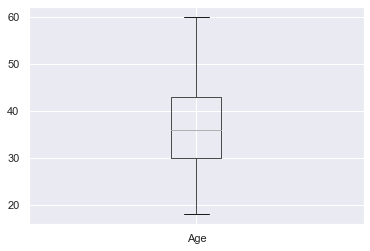

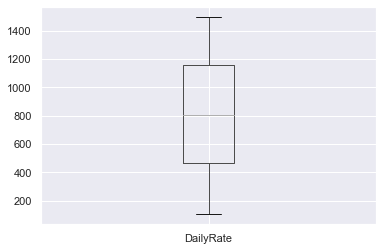

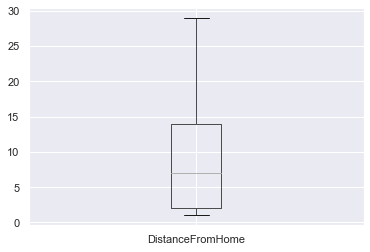

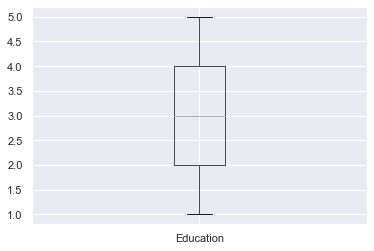

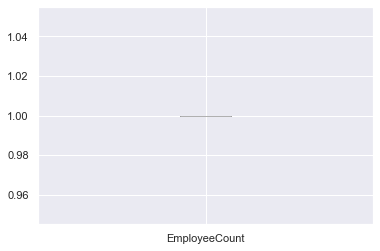

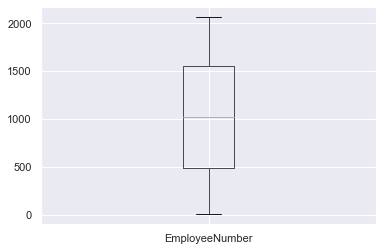

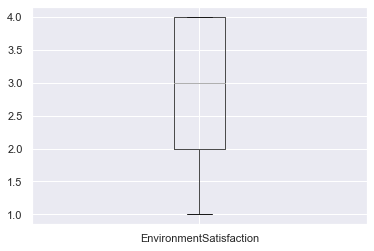

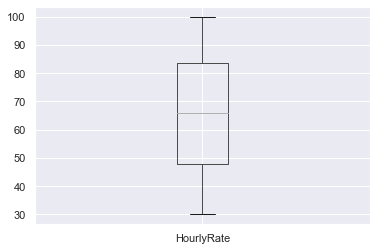

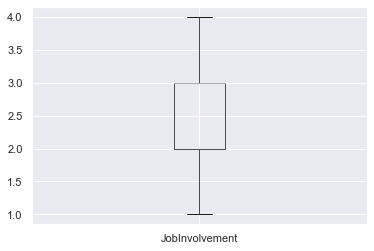

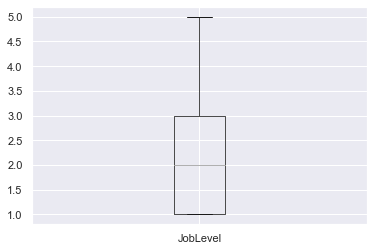

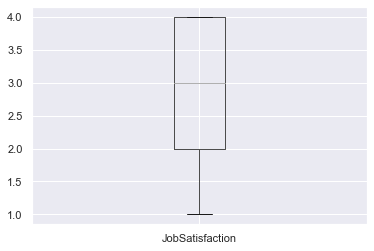

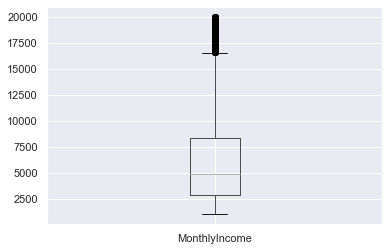

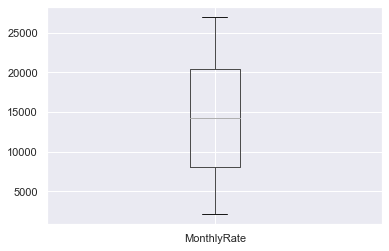

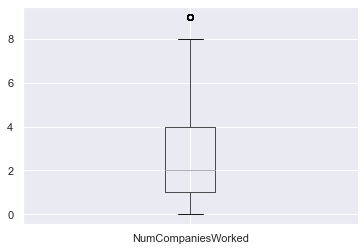

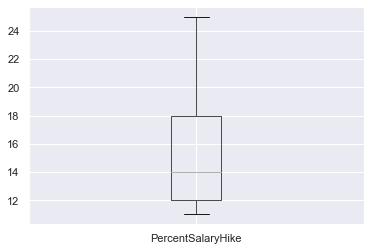

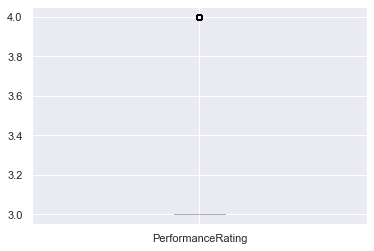

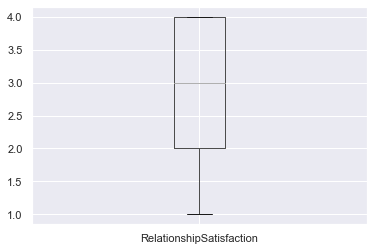

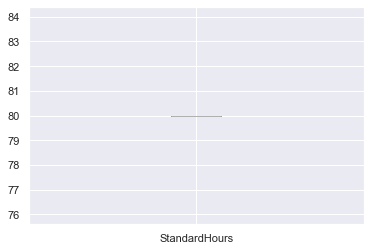

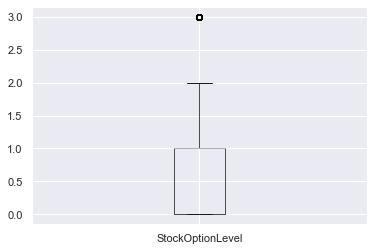

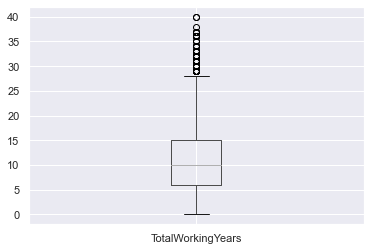

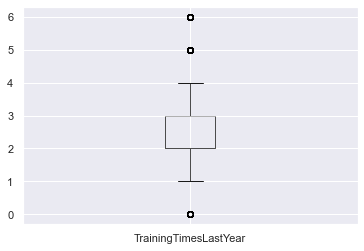

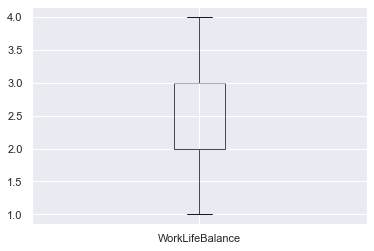

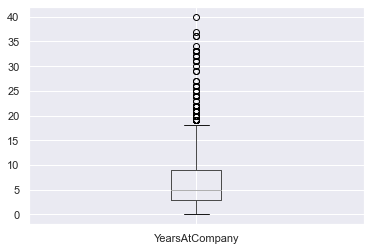

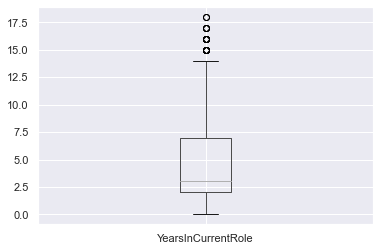

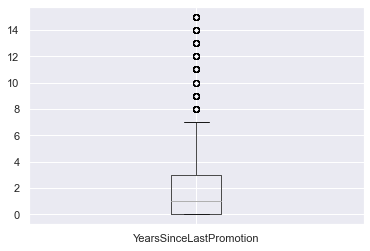

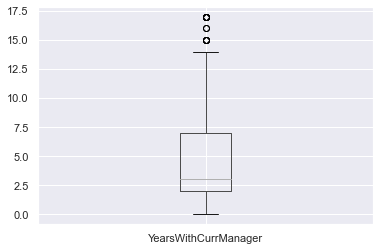

In [396]:
numeric_cols = df.select_dtypes(include=np.number)

for column in numeric_cols:
    plt.figure()
    df.boxplot([column])

In [353]:
#deleting outliers
df = df[df['MonthlyIncome'] < 12000]
df = df[df['YearsSinceLastPromotion'] < 6]
df = df[df['YearsWithCurrManager'] < 15]
df = df[df['TotalWorkingYears'] < 21]
df = df[df['TrainingTimesLastYear'] < 5]
df = df[df['YearsAtCompany'] < 17]
df = df[df['YearsInCurrentRole'] < 15]
df = df[df['JobLevel'] < 3.5]


df['YearsWithCurrManager'].value_counts()

2     275
0     197
7     116
3     112
4      68
1      51
8      41
9      28
5      19
6      11
10      7
12      6
11      6
13      1
Name: YearsWithCurrManager, dtype: int64

In [356]:
#cleaned_df = df.drop(columns= ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
                              #'PerformanceRating'])

In [354]:
df = df.drop(columns= ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
                              'PerformanceRating'])
numeric_cols = df.select_dtypes(include=np.number)

<ipython-input-357-6763f38c2c78>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


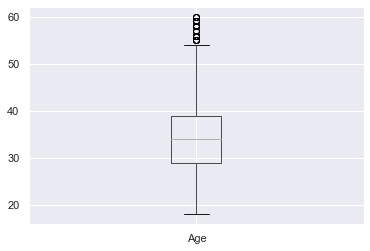

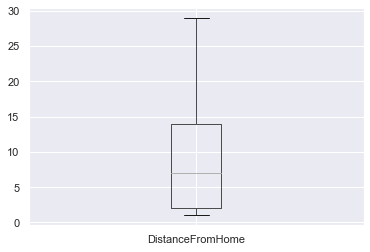

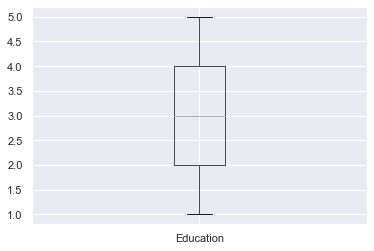

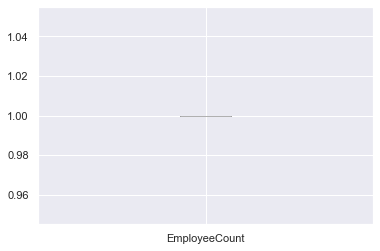

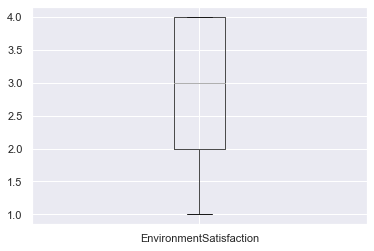

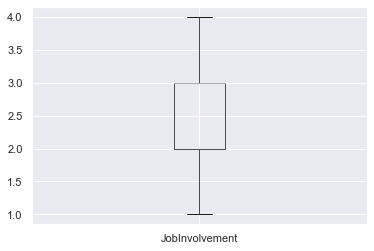

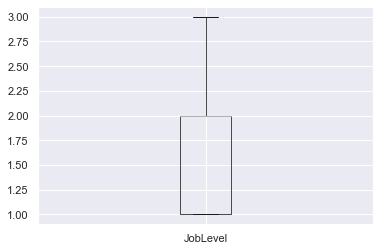

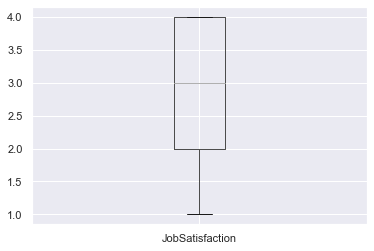

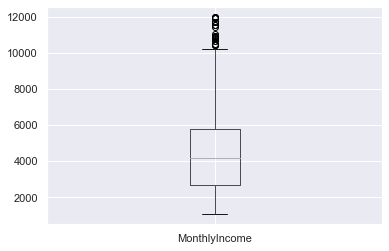

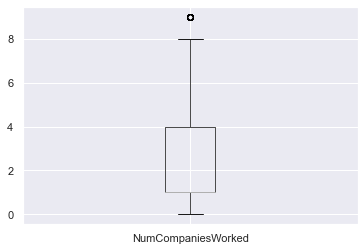

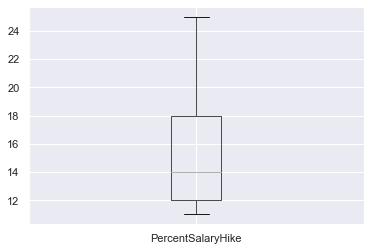

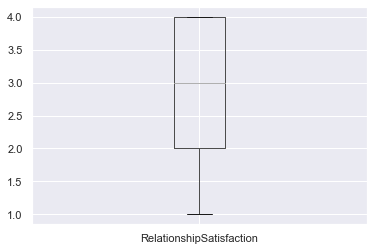

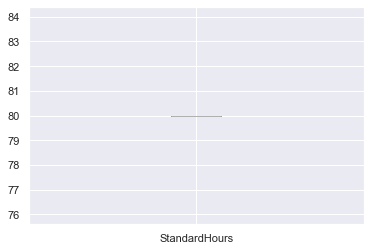

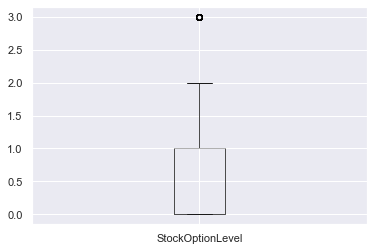

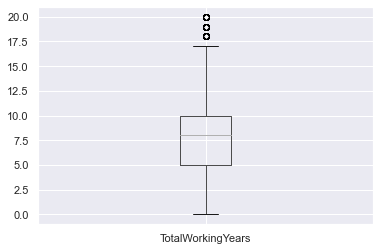

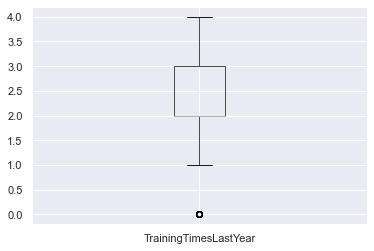

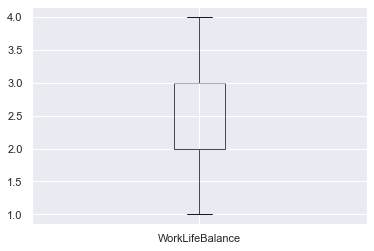

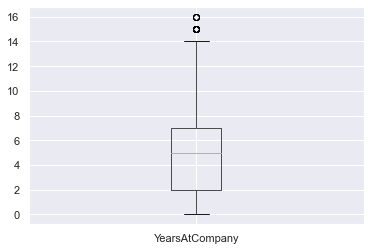

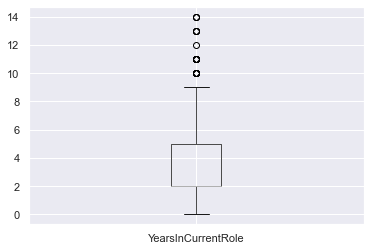

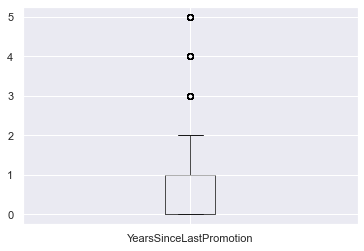

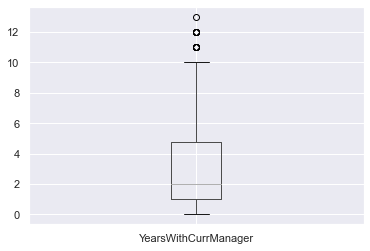

In [357]:
for column in numeric_cols:
    plt.figure()
    df.boxplot([column])

In [202]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x =='No' else 1)

In [203]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,5993,8,Y,Yes,11,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,Male,2,2,Research Scientist,2,5130,1,Y,No,23,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,2,1,Laboratory Technician,3,2090,6,Y,Yes,15,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,3,1,Research Scientist,3,2909,1,Y,Yes,11,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,3,1,Laboratory Technician,2,3468,9,Y,No,12,4,80,1,6,3,3,2,2,2,2


In [204]:
df['Attrition'].value_counts()
#attrition = no is 1233, much higher rate than turnover of 237 employees

0    763
1    175
Name: Attrition, dtype: int64

In [205]:
df['EmployeeCount'].unique()

array([1])

In [206]:
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])
#dropping these columns because they each only contain one unique value and will not help analysis

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       938 non-null    int64 
 1   Attrition                 938 non-null    int64 
 2   BusinessTravel            938 non-null    object
 3   Department                938 non-null    object
 4   DistanceFromHome          938 non-null    int64 
 5   Education                 938 non-null    int64 
 6   EducationField            938 non-null    object
 7   EnvironmentSatisfaction   938 non-null    int64 
 8   Gender                    938 non-null    object
 9   JobInvolvement            938 non-null    int64 
 10  JobLevel                  938 non-null    int64 
 11  JobRole                   938 non-null    object
 12  JobSatisfaction           938 non-null    int64 
 13  MonthlyIncome             938 non-null    int64 
 14  NumCompaniesWorked       

In [208]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [209]:
#numeric_columns = df.select_dtypes(include=['int64'])
#numeric_columns

## Correlation

In [210]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.100958
NumCompaniesWorked          0.042538
PercentSalaryHike          -0.002079
TrainingTimesLastYear      -0.006281
Education                  -0.032666
WorkLifeBalance            -0.062773
RelationshipSatisfaction   -0.073439
YearsSinceLastPromotion    -0.079108
JobSatisfaction            -0.125723
JobInvolvement             -0.137475
StockOptionLevel           -0.138060
EnvironmentSatisfaction    -0.149480
Age                        -0.152731
MonthlyIncome              -0.159990
JobLevel                   -0.165300
YearsWithCurrManager       -0.200570
YearsInCurrentRole         -0.204840
TotalWorkingYears          -0.206670
YearsAtCompany             -0.226950
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

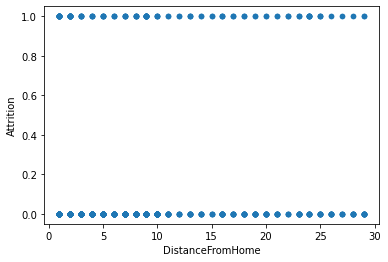

In [211]:
#df.plot.scatter('PerformanceRating', 'Attrition')
df.plot.scatter('DistanceFromHome','Attrition')

## Encoding 

In [212]:
numeric_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(include=['object'])

In [213]:
#df = df.astype({"Name":'category', "Age":'int64'})
#df = df.astype({'BusinessTravel':'category', 'Department':'category', 'EducationField':'category',
             #  'Gender': 'category', 'JobRole':'category', 'MaritalStatus':'category', 'OverTime':'category'})

In [214]:
encodedcats = pd.get_dummies(categorical_cols)
encodecats = pd.concat([encodedcats, numeric_cols], axis = 1)
encodecats.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.249267
JobRole_Sales Representative         0.166000
BusinessTravel_Travel_Frequently     0.127994
JobRole_Laboratory Technician        0.100993
DistanceFromHome                     0.100958
EducationField_Technical Degree      0.080550
Department_Sales                     0.063260
EducationField_Human Resources       0.057013
NumCompaniesWorked                   0.042538
EducationField_Marketing             0.039830
Department_Human Resources           0.030641
JobRole_Human Resources              0.030641
Gender_Male                          0.019709
PercentSalaryHike                   -0.002079
TrainingTimesLastYear               -0.006281
Gender_Female                       -0.019709
EducationField_Other                -0.024375
JobRole_Manager                     -0.027128
JobRole_Sales Executive             -0.032121
EducationField_Medical              -0.032477
Education                         

In [215]:
df.select_dtypes(include = np.number, exclude = object).corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.152731,0.007123,0.241917,0.011192,0.041363,0.257422,0.013614,0.237086,0.295564,0.034404,0.039816,0.071817,0.519703,0.043746,-0.007228,0.113158,0.095494,0.059865,0.097699
Attrition,-0.152731,1.000000,0.100958,-0.032666,-0.149480,-0.137475,-0.165300,-0.125723,-0.159990,0.042538,-0.002079,-0.073439,-0.138060,-0.206670,-0.006281,-0.062773,-0.226950,-0.204840,-0.079108,-0.200570
DistanceFromHome,0.007123,0.100958,1.000000,-0.011548,-0.012446,-0.011216,0.084110,0.006080,0.059777,-0.011390,0.009512,-0.010845,0.066140,0.045074,-0.026157,-0.044153,0.021656,0.027669,-0.015766,0.010063
Education,0.241917,-0.032666,-0.011548,1.000000,-0.025758,0.044254,0.117126,-0.019498,0.113193,0.142724,-0.003333,0.008797,0.048764,0.184877,0.029593,0.041402,0.075930,0.083922,0.015406,0.046545
EnvironmentSatisfaction,0.011192,-0.149480,-0.012446,-0.025758,1.000000,0.019876,0.014378,-0.031997,-0.009230,0.005492,-0.019040,0.029313,0.047875,-0.027430,0.017898,0.008006,0.019007,0.035613,0.044996,0.005386
JobInvolvement,0.041363,-0.137475,-0.011216,0.044254,0.019876,1.000000,-0.004403,-0.008958,-0.025667,0.030844,-0.004147,0.028523,-0.009615,0.019911,0.002215,0.000840,0.036442,0.014357,-0.007634,0.049172
JobLevel,0.257422,-0.165300,0.084110,0.117126,0.014378,-0.004403,1.000000,-0.001587,0.866081,0.101258,-0.029763,-0.003611,0.037584,0.526005,-0.013759,0.032458,0.408271,0.358830,0.105858,0.368542
JobSatisfaction,0.013614,-0.125723,0.006080,-0.019498,-0.031997,-0.008958,-0.001587,1.000000,-0.001988,-0.039002,0.004850,0.039348,0.006327,-0.017531,-0.047618,-0.035318,0.054643,0.033321,0.044342,0.022873
MonthlyIncome,0.237086,-0.159990,0.059777,0.113193,-0.009230,-0.025667,0.866081,-0.001988,1.000000,0.115638,-0.019945,0.000198,0.028550,0.497600,-0.043121,0.016142,0.380003,0.335616,0.109425,0.341767
NumCompaniesWorked,0.295564,0.042538,-0.011390,0.142724,0.005492,0.030844,0.101258,-0.039002,0.115638,1.000000,-0.006739,0.015916,0.046688,0.306875,-0.000230,0.012347,-0.151128,-0.111169,-0.034462,-0.105262


## Heatmap

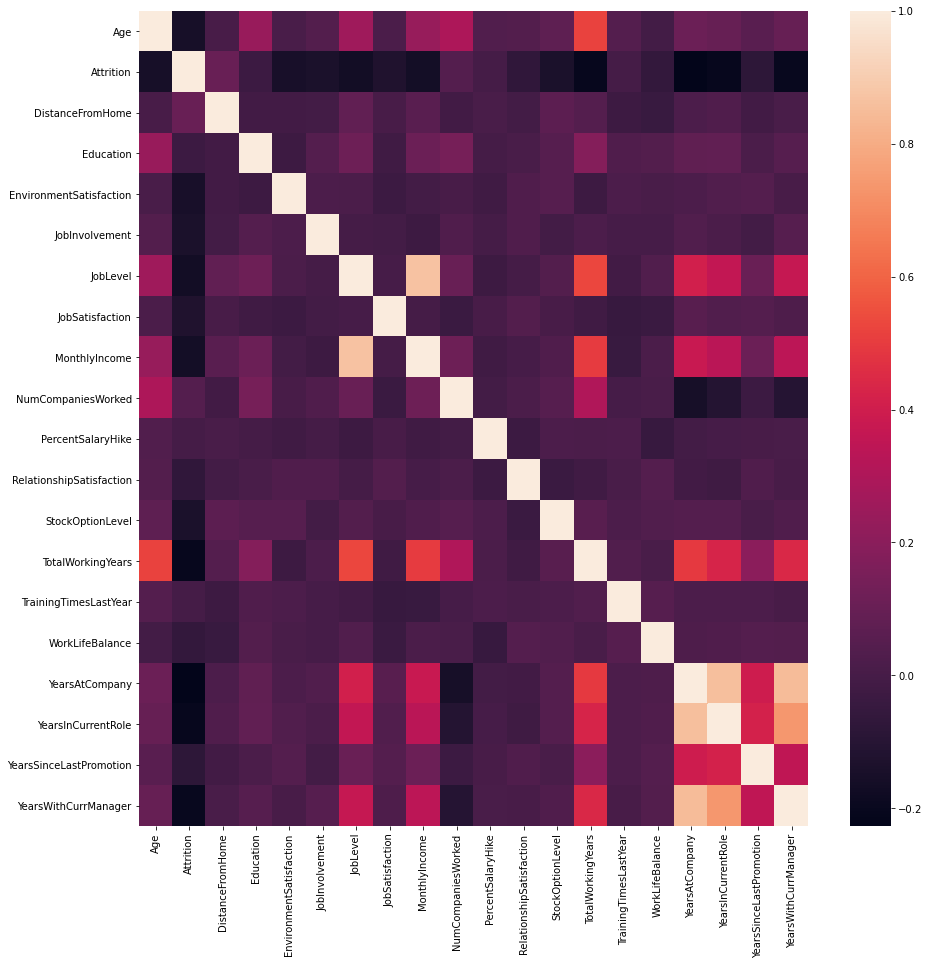

In [216]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include = np.number, exclude = object).corr());

In [217]:
#highly correlated job level and monthly income, 

In [218]:
#df[['EmployeeCount']].std()

#if standard deviation is 0, drop them from project because it's a contant 

In [219]:
encodecats.corr()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel_Non-Travel,1.000000,-0.167393,-0.527931,-0.013738,0.007550,-0.001398,-0.005076,0.015488,-0.027114,-0.026798,-0.010418,0.056075,-0.072031,0.072031,0.023677,-0.013738,-0.016135,-0.019458,-0.017659,0.081338,0.004132,0.019957,-0.031531,0.039061,-0.039061,0.013109,-0.084349,0.029057,0.002966,-0.010148,-0.023957,0.029963,-0.017816,0.007317,0.019725,0.036800,-0.015137,0.057177,-0.012882,-0.065107,0.026923,0.035719,0.052671,0.003974,0.054813
BusinessTravel_Travel_Frequently,-0.167393,1.000000,-0.748932,0.002165,-0.018626,0.018332,0.036053,0.021972,-0.024641,0.001122,-0.015836,-0.017521,0.020386,-0.020386,-0.007654,0.002165,0.013297,-0.027603,-0.002489,-0.045197,-0.015814,-0.013329,0.057353,-0.012097,0.012097,-0.009697,0.127994,-0.017952,-0.033238,-0.022966,0.019236,-0.013138,0.058166,-0.021922,-0.042285,-0.037363,0.063703,-0.015410,0.002681,0.038523,0.025216,0.023824,0.028066,0.013113,0.005274
BusinessTravel_Travel_Rarely,-0.527931,-0.748932,1.000000,0.007368,0.010971,-0.014852,-0.027646,-0.029338,0.039451,0.017045,0.020644,-0.022597,0.030853,-0.030853,-0.009320,0.007368,-0.000609,0.036857,0.014013,-0.015736,0.010845,-0.001932,-0.028213,-0.015833,0.015833,-0.000458,-0.053566,-0.004066,0.026639,0.026604,-0.000469,-0.008821,-0.038132,0.013967,0.023168,0.007451,-0.044703,-0.025156,0.006349,0.010575,-0.039818,-0.044532,-0.059579,-0.013967,-0.041385
Department_Human Resources,-0.013738,0.002165,0.007368,1.000000,-0.306806,-0.150403,0.666390,-0.084161,-0.082344,-0.057145,0.007456,-0.022274,-0.012377,0.012377,-0.067911,1.000000,-0.117466,-0.012863,-0.073981,-0.021062,-0.130178,-0.123462,-0.064489,0.016631,-0.016631,-0.000188,0.030641,-0.025809,0.014362,-0.025077,0.003794,-0.066476,-0.037137,-0.061050,0.029458,-0.016445,0.041767,-0.020013,-0.025749,-0.008052,0.037174,-0.010572,-0.033424,0.035750,-0.014311
Department_Research & Development,0.007550,-0.018626,0.010971,-0.306806,1.000000,-0.894801,-0.204452,0.154203,-0.489895,0.189898,0.048939,0.047002,-0.035776,0.035776,0.221348,-0.306806,0.382868,-0.037043,0.241133,0.068649,0.424301,-0.734522,-0.383669,0.011308,-0.011308,0.030403,-0.074739,0.006529,-0.048230,0.032885,0.038292,-0.249243,0.008748,-0.203020,0.034302,0.067726,-0.003831,-0.003352,0.006593,-0.055653,-0.066419,-0.044423,-0.048972,-0.010453,-0.036015
Department_Sales,-0.001398,0.018332,-0.014852,-0.150403,-0.894801,1.000000,-0.100227,-0.120696,0.547491,-0.170445,-0.054331,-0.038374,0.042967,-0.042967,-0.198063,-0.150403,-0.342591,0.044512,-0.215766,-0.061427,-0.379665,0.820878,0.428775,-0.019547,0.019547,-0.031492,0.063260,0.005324,0.043360,-0.022395,-0.041554,0.290076,0.008334,0.239519,-0.049449,-0.062635,-0.015613,0.012870,0.005231,0.061585,0.051553,0.051103,0.066547,-0.005912,0.044123
EducationField_Human Resources,-0.005076,0.036053,-0.027646,0.666390,-0.204452,-0.100227,1.000000,-0.129352,-0.054873,-0.096210,-0.037402,-0.048692,-0.042563,0.042563,-0.045255,0.666390,-0.078278,-0.008572,-0.049300,-0.014036,-0.086749,-0.082274,-0.042975,0.002832,-0.002832,-0.019798,0.057013,-0.022028

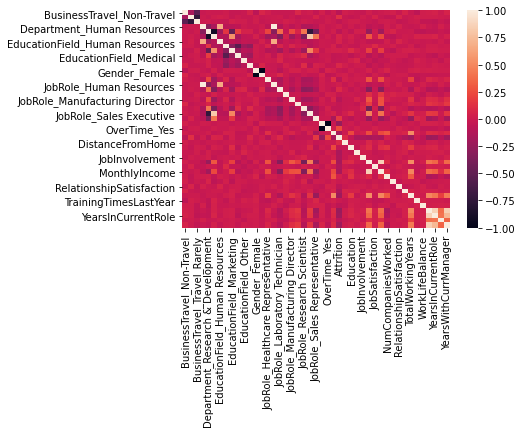

In [220]:
sns.heatmap(encodecats.corr());

In [221]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,4,1,6,3,3,2,2,2,2


In [222]:
df['Attrition'].value_counts()

0    763
1    175
Name: Attrition, dtype: int64

## Train Test Split

In [223]:
list(df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [224]:
y = cleaned_df['Attrition']
X = cleaned_df.drop(columns=['Attrition'])

In [225]:
#from imblearn.over_sampling import SMOTE

#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X, y)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Encode Training Set

In [238]:
train_numeric_cols = X_train.select_dtypes(include=np.number)
train_categorical_cols = X_train.select_dtypes(include=['object'])

In [239]:

ohe = OneHotEncoder(drop = 'first', sparse = False)
scale = StandardScaler()


#mini_pipe_cat = Pipeline([('one_hot', ohe), ('scaler', scale)])
#mini_pipe_num = Pipeline([('scaler', scale)])
train_encodedcats = pd.get_dummies(train_categorical_cols)
X_train = pd.concat([train_encodedcats, train_numeric_cols], axis = 1)

encode test data

In [240]:
test_numeric_cols = X_test.select_dtypes(include=np.number)
test_categorical_cols = X_test.select_dtypes(include=['object'])
test_encodedcats = pd.get_dummies(test_categorical_cols)
X_test = pd.concat([test_encodedcats, test_numeric_cols], axis = 1)

In [241]:
y_test.value_counts()

No     252
Yes     58
Name: Attrition, dtype: int64

In [242]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1234 to 910
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Non-Travel          628 non-null    uint8
 1   BusinessTravel_Travel_Frequently   628 non-null    uint8
 2   BusinessTravel_Travel_Rarely       628 non-null    uint8
 3   Department_Human Resources         628 non-null    uint8
 4   Department_Research & Development  628 non-null    uint8
 5   Department_Sales                   628 non-null    uint8
 6   EducationField_Human Resources     628 non-null    uint8
 7   EducationField_Life Sciences       628 non-null    uint8
 8   EducationField_Marketing           628 non-null    uint8
 9   EducationField_Medical             628 non-null    uint8
 10  EducationField_Other               628 non-null    uint8
 11  EducationField_Technical Degree    628 non-null    uint8
 12  Gender_Female      

In [243]:
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

No     763
Yes    175
Name: Attrition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

No     511
Yes    511
Name: Attrition, dtype: int64


## Decision Tree

In [123]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

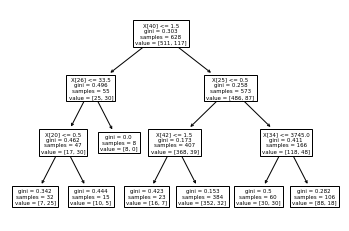

In [124]:
tree.plot_tree(clf);

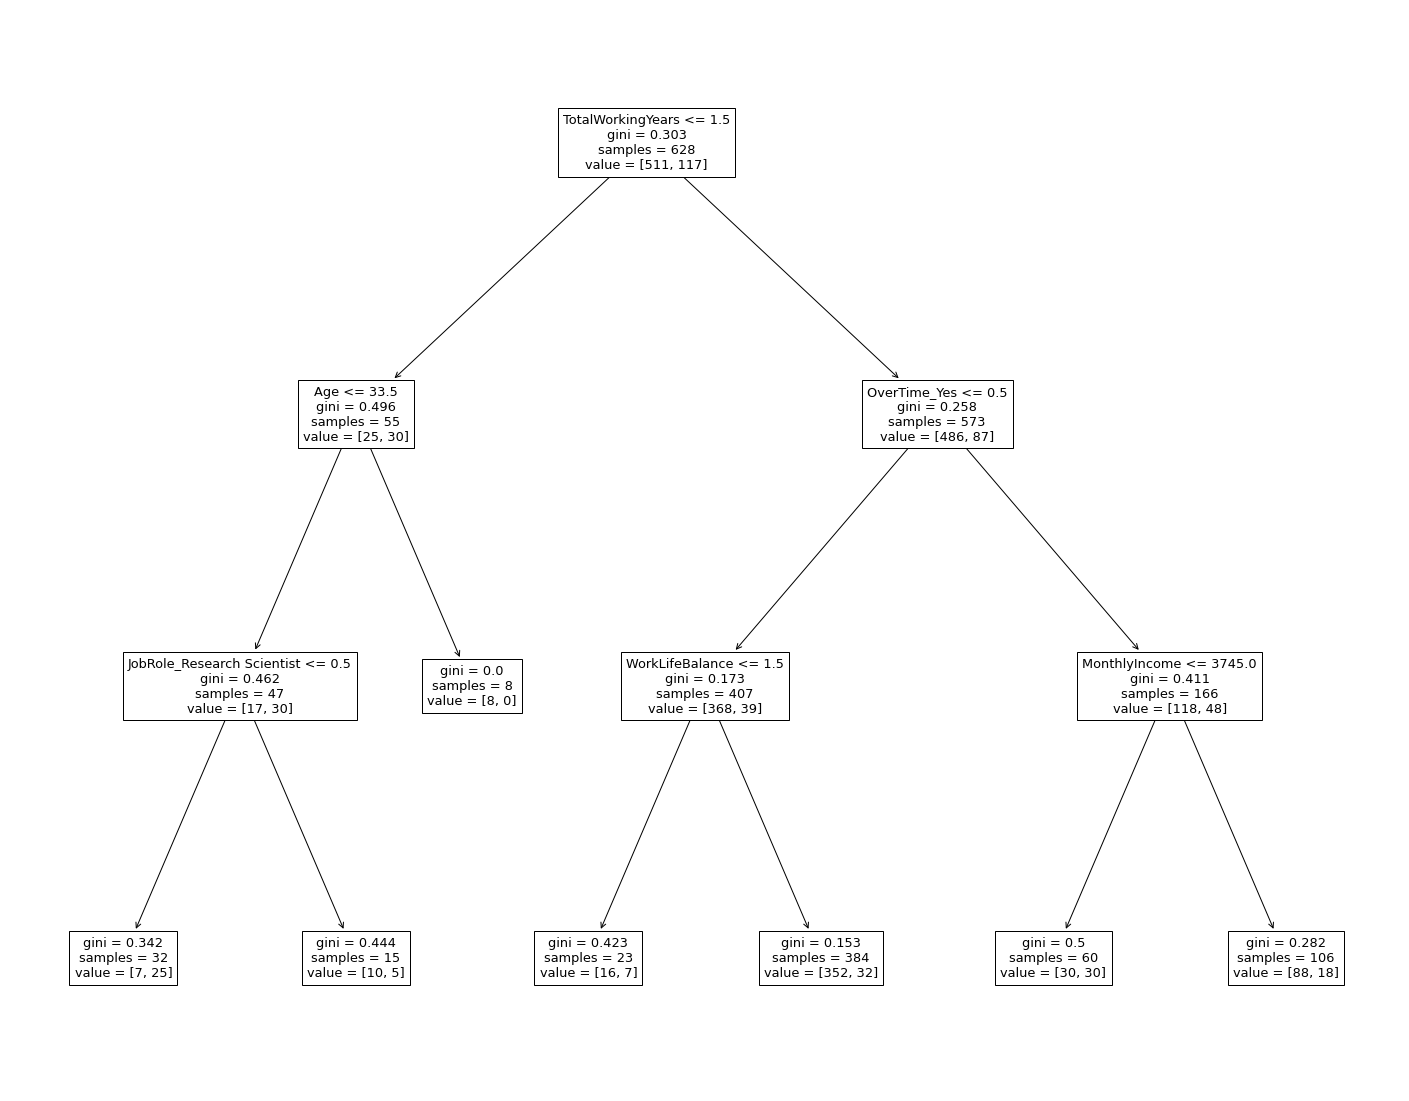

In [125]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X_train.columns)

In [126]:
#do after i transform test data
#y_pred = clf.predict(X_test)
#print('MSE score:', mse(y_test, y_pred))
#print('R-sq score:', r2_score(y_test,y_pred))

In [127]:
dtr = tree.DecisionTreeRegressor(max_depth=3)
dtr = clf.fit(X_train, y_train)

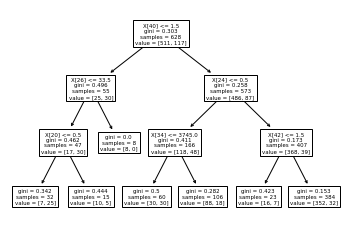

In [128]:
tree.plot_tree(dtr);

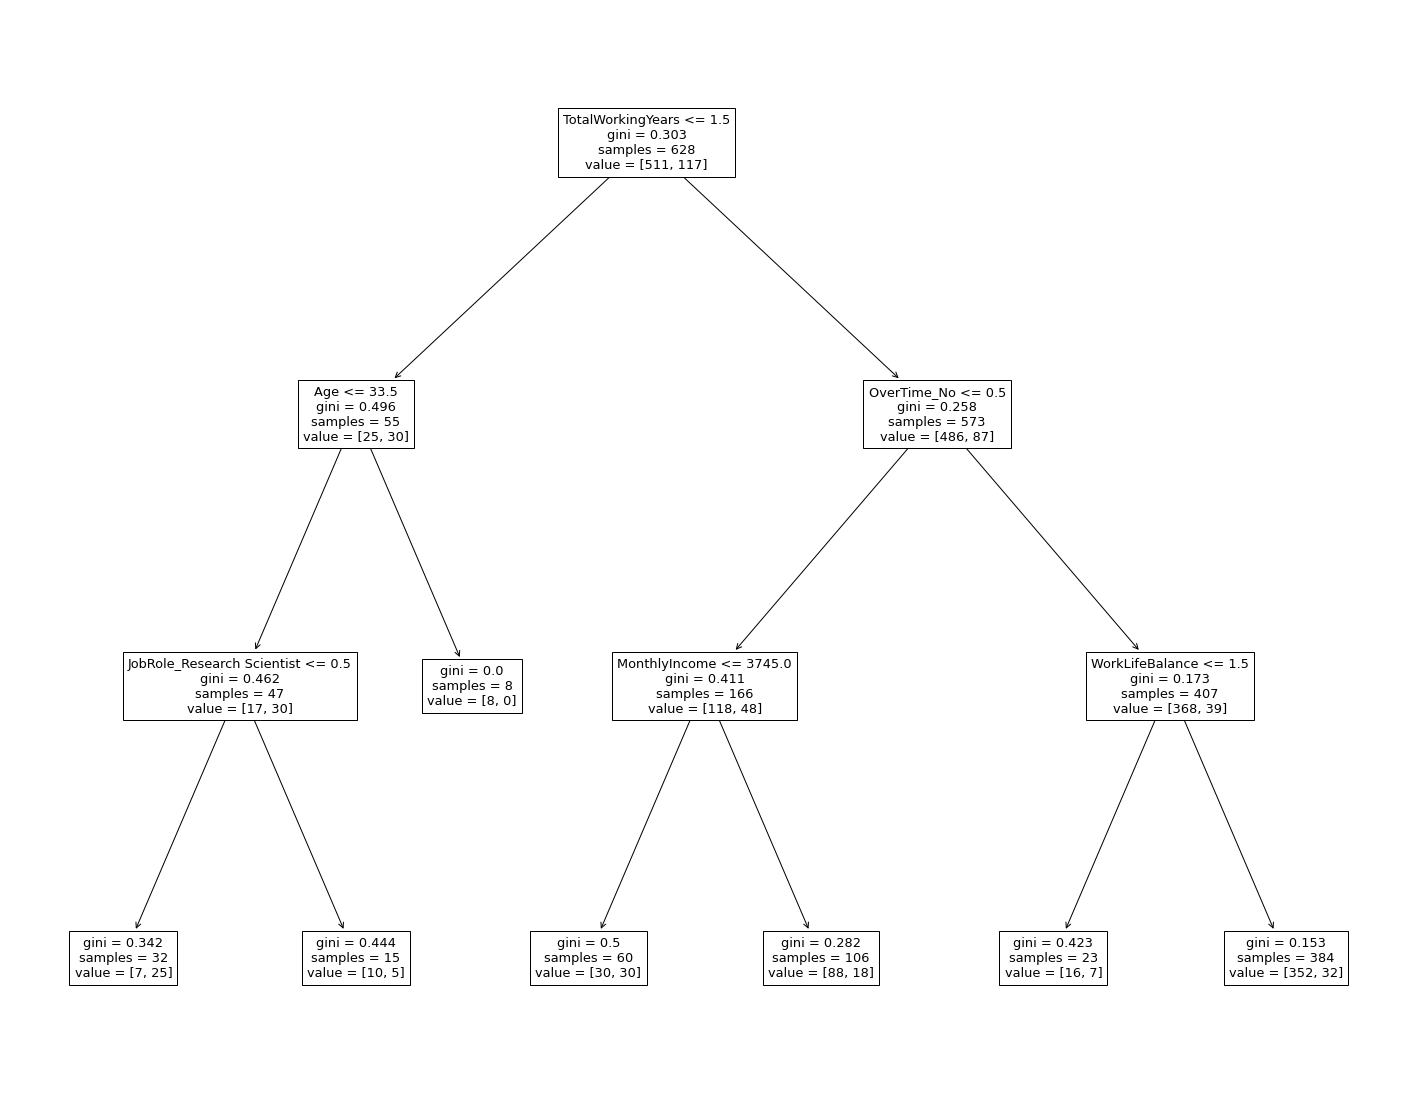

In [129]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, feature_names=X_train.columns)

In [311]:
#X_train_transformed = mini_pipe.fit_transform(X_train)
lg = LogisticRegression(random_state=42, C = 1e-7, max_iter = 9000)

#X_train_transformed

In [312]:
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train_resampled)
X_test_transformed = scale.transform(X_test)

In [313]:
lg.fit(X_train_transformed, y_train_resampled)

LogisticRegression(C=1e-07, max_iter=9000, random_state=42)

In [314]:
y_pred = lg.predict(X_test_transformed)

In [315]:
lg.score(X_train_transformed, y_train_resampled)

0.8669275929549902

In [316]:
y_train_resampled.apply(lambda x: 0 if x == 'No' else 1)

0       0
1       0
2       1
3       1
4       1
       ..
1017    1
1018    1
1019    1
1020    1
1021    1
Name: Attrition, Length: 1022, dtype: int64

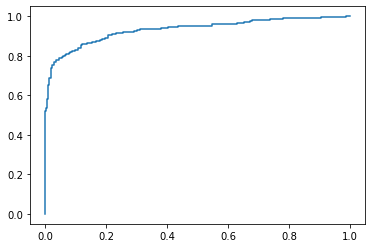

In [317]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_resampled.apply(lambda x: 0 if x == 'No' else 1), lg.predict_proba(X_train_transformed)[:,1])
plt.plot(fpr,tpr)

In [318]:
cv_scores = cross_val_score(lg, X_train_transformed, y_train_resampled, scoring = 'roc_auc', cv=3)
cv_scores

array([0.87705538, 0.94781562, 0.94394464])

In [319]:
print("Model: Original CLF Depth 5")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

Model: Original CLF Depth 5
Accuracy score: 0.8096774193548387
________________________________________________________________________________
 
              precision    recall  f1-score   support

          No       0.90      0.86      0.88       252
         Yes       0.49      0.60      0.54        58

    accuracy                           0.81       310
   macro avg       0.70      0.73      0.71       310
weighted avg       0.83      0.81      0.82       310




data wrangle - data definitions 

eda and descriptive stats end of phase 1 beg of phase 2

in eda- take some of hgc graphs notebook- pie charts and distributions, etc

preprocessing and transform pipeline and could save pickle object 

modeling discussion 

In [168]:
y_test

723     No
718     No
1002    No
1276    No
1090    No
        ..
493     No
389     No
599     No
590     No
1440    No
Name: Attrition, Length: 310, dtype: object

In [169]:
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [67]:
# change object to category to pass into decision tree 

In [68]:
#possible outliers, try only running numeric columns

In [69]:
cleaned_df = df.select_dtypes(include=np.number)

In [70]:
cleaned_df

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,2,2,3,2,4,5993,8,11,1,0,8,0,1,6,4,0,5
1,49,0,8,1,3,2,2,2,5130,1,23,4,1,10,3,3,10,7,1,7
2,37,1,2,2,4,2,1,3,2090,6,15,2,0,7,3,3,0,0,0,0
3,33,0,3,4,4,3,1,3,2909,1,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,1,3,1,2,3468,9,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,0,5,3,4,2,1,3,2966,0,18,4,0,5,2,3,4,2,0,0
1465,36,0,23,2,3,4,2,4,2571,4,17,3,1,17,3,3,5,2,0,3
1467,27,0,4,3,2,4,2,2,6142,1,20,2,1,6,0,3,6,2,0,3
1468,49,0,2,3,4,2,2,2,5390,2,14,4,0,17,3,2,9,6,0,8


In [71]:
#train_numeric_cols = X_train.select_dtypes(include=np.number)
#train_categorical_cols = X_train.select_dtypes(include=['object'])

In [72]:
#cleaned_df = df.drop(columns= ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MaritalStatus', 'MonthlyRate',
                              'PerformanceRating', 'BusinessTravel', 'Department', 'EducationField',
                              'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

KeyError: "['DailyRate' 'EmployeeNumber' 'HourlyRate' 'MaritalStatus' 'MonthlyRate'\n 'PerformanceRating' 'MaritalStatus'] not found in axis"

In [ ]:
y = cleaned_df['Attrition']
X = cleaned_df.drop(columns=['Attrition'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
lg = LogisticRegression(random_state=42)

In [ ]:
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

In [ ]:
lg.fit(X_train_transformed, y_train)

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
lg.score(X_train_transformed, y_train)

In [ ]:
cv_scores = cross_val_score(lg, X_train_transformed, y_train, scoring = 'roc_auc', cv=3)
cv_scores

In [ ]:
print("Model: Original CLF Depth 5")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

In [ ]:
y_test

In [ ]:
y_pred

In [143]:
#from sklearn.linear_model import Lasso
#y_train = y_train.apply(lambda x: 0 if x =='No' else 1)
#y_test = y_test.apply(lambda x: 0 if x =='No' else 1)
#lasso = Lasso()
#lasso.fit(X_train, y_train)

Lasso()

In [144]:
#y_pred = lasso.predict(X_test)

array([ 0.00667812,  0.21556562,  0.04963155,  0.1994617 ,  0.0394073 ,
        0.15969429,  0.11914486,  0.23647754,  0.25090155,  0.22002605,
        0.1970577 ,  0.21038108,  0.17435001,  0.19668117,  0.16128731,
        0.23051098,  0.24200964,  0.23986631,  0.06805258,  0.24661489,
        0.12001378,  0.00911108,  0.13206275,  0.12571966,  0.25857698,
        0.11459753,  0.16218519,  0.24907682,  0.18480598,  0.24788931,
        0.25614401,  0.20878807,  0.25513028,  0.22300933,  0.09067337,
        0.25295798,  0.25165461,  0.16531328,  0.13513292, -0.00986026,
        0.25023538,  0.15372773,  0.25394276,  0.25840319,  0.24206757,
        0.20977284,  0.15080238,  0.0601744 ,  0.25159668,  0.26095202,
        0.22080808,  0.1640968 ,  0.2624871 ,  0.12114337,  0.06764708,
        0.20565997,  0.17956351,  0.21388571,  0.03439655,  0.12710993,
        0.20267669,  0.15369877,  0.26083616,  0.19335032,  0.04079757,
        0.20823775,  0.26156026,  0.19618878,  0.22807801,  0.25

In [147]:
#print("Model:")
#print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
#print("__"*40)
#print(" ")
#print(classification_report(y_test, y_pred))



In [321]:
df['AnnualIncome'] = df['MonthlyIncome'] * 12

In [326]:
df['MonthlyIncome'].unique()

array([ 5993,  5130,  2090,  2909,  3468,  3068,  2670,  2693,  9526,
        4193,  2911,  2661,  2028,  2935,  3944,  3407, 11994,  2960,
        6825,  2496,  2293,  2645,  2683,  2014,  3419,  5376,  1951,
        8726,  4011,  3022,  5772,  2269,  3441,  5454,  9884,  4157,
        9069,  4014,  5915,  6499,  2194,  3388,  5473,  2703,  2501,
        6220,  3038,  4424,  4312,  5021,  5126,  2859,  5329,  4325,
        2322,  2075,  9619,  5441,  5209,  5010,  4999,  4221,  2042,
        2073,  2956,  4809,  5163,  5744,  2889,  6074,  2774,  4505,
        7428,  2835,  2613,  6146,  4963,  2368,  1675,  2523,  6567,
        4739,  9208,  4559,  8189,  2942,  4941, 10650,  5902,  8639,
        6347,  4200,  3452,  4317,  2632,  4668,  3204,  2720,  2238,
        1483,  7295,  2306,  8998,  4319,  6132,  3346, 10855,  2231,
        2024,  2713,  9439,  2566,  2451,  8686,  3058,  5006,  4257,
        2500,  1102,  2288,  3929,  2311,  3690,  4450,  9547,  2279,
        5916,  2089,

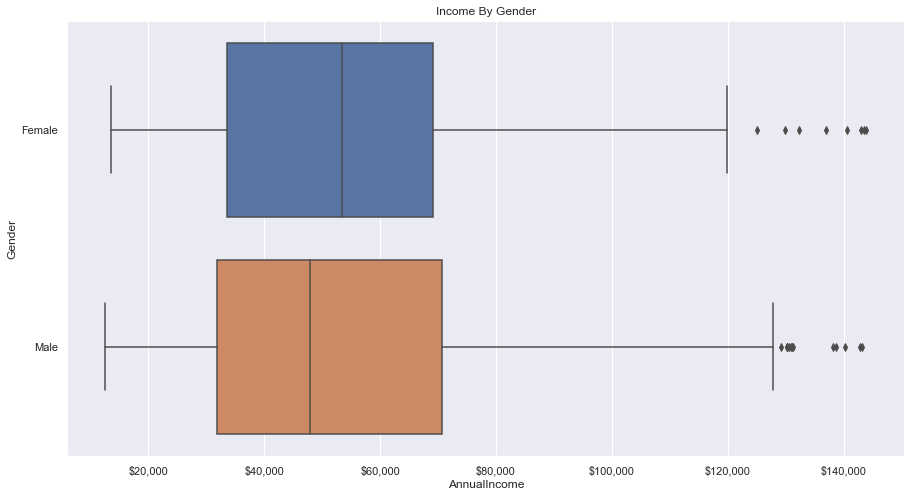

In [339]:
plt.figure(figsize = (15,8))

sns.set_theme()

ax = sns.boxplot(x='AnnualIncome', y='Gender', data=df)

ax.set_title('Income By Gender');

#title
#labels


ax.xaxis.set_major_formatter('${x:,.0f}');

In [342]:
df['Age'].value_counts()
#Age 18-60

34    59
35    54
29    53
31    52
32    48
36    47
30    45
38    44
33    40
28    39
27    37
37    34
40    30
26    28
24    24
45    24
25    22
42    21
39    21
41    20
44    17
43    16
46    15
23    13
47    12
22    12
49    11
50     9
21     9
20     9
51     8
19     8
18     7
56     7
48     6
52     6
54     6
59     5
53     5
58     5
55     4
57     3
60     3
Name: Age, dtype: int64

In [359]:
df['MaritalStatus'].value_counts()

Married     416
Single      318
Divorced    204
Name: MaritalStatus, dtype: int64

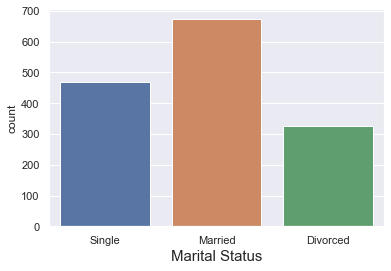

In [387]:
#plt.figure(figsize = (7,10))


sns.countplot(x='MaritalStatus', data=df)
plt.xlabel('Marital Status', fontsize=15);

In [363]:
df['Gender'].value_counts()

Male      587
Female    351
Name: Gender, dtype: int64

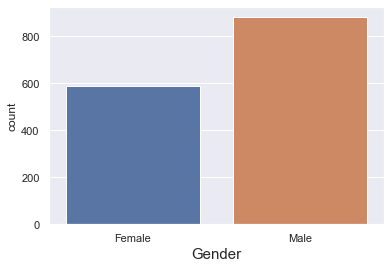

In [388]:
#plt.figure(figsize = (7,10))
ax = sns.countplot(x='Gender', data=df)
plt.xlabel('Gender', fontsize=15);

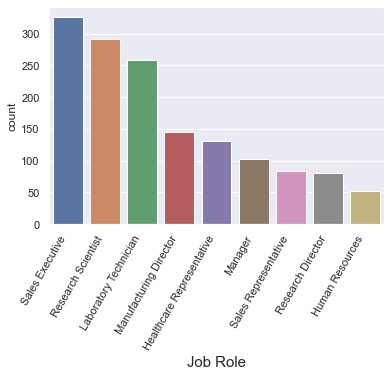

In [406]:

sns.countplot(x='JobRole', data=df)
plt.xticks(rotation=60, ha = 'right')
plt.xlabel('Job Role', fontsize=15);

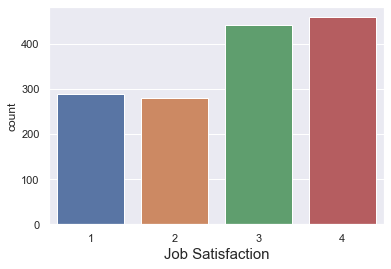

In [416]:
sns.countplot(x='JobSatisfaction', data=df)
#plt.xticks(rotation=60, ha = 'right')
plt.xlabel('Job Satisfaction', fontsize=15);

In [408]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [417]:
we_can_pickle_that = df

In [ ]:
we_can_pickle_that.to_pickle()